В этом проекте используется рейтинг стран по уровню счастья за 2020 год (https://www.kaggle.com/yamaerenay/world-happiness-report-preprocessed?select=2020_report.csv).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('2020_report.csv')

In [4]:
df.head()

,country,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            138 non-null    object 
 1   happiness_score    138 non-null    float64
 2   gdp_per_capita     138 non-null    float64
 3   social_support     138 non-null    float64
 4   health             138 non-null    float64
 5   freedom            138 non-null    float64
 6   generosity         138 non-null    float64
 7   government_trust   138 non-null    float64
 8   dystopia_residual  138 non-null    float64
 9   continent          138 non-null    object 
dtypes: float64(8), object(2)
memory usage: 10.9+ KB


В данных нет пустых значений, которые надо было бы заполнить, но столбцы continent и country содержат категориальные данные. Столбец continent имеет смысл превратить в числовые данные, а country сделать индексом. Прежде чем сделать это, можно посмотреть на средние значения по континентам (предсказуемые):

In [6]:
df.groupby(by='continent').mean()

,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual
continent,,,,,,,,
Africa,4.504343,0.509736,0.884771,0.428340,0.390560,0.182429,0.107228,2.001281
Asia,5.280767,0.908411,1.159278,0.725358,0.479340,0.208118,0.123463,1.676795
Australia,7.261200,1.276357,1.482182,1.015373,0.634334,0.325350,0.398632,2.128956
Europe,6.392521,1.177794,1.372946,0.896147,0.492415,0.176327,0.164972,2.111921
North America,6.878900,1.233341,1.355504,0.895240,0.577510,0.220922,0.195707,2.400645
South America,5.895495,0.824490,1.238736,0.755552,0.509570,0.157382,0.091580,2.318180


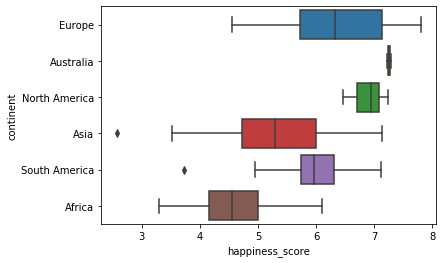

In [7]:
sbn.boxplot(df['happiness_score'],df['continent'])
plt.show()

In [8]:
df = pd.get_dummies(df, columns=['continent'])

In [9]:
df = df.set_index('country')

In [10]:
df.head()

,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent_Africa,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America
country,,,,,,,,,,,,,,
Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,0,0,0,1,0,0
Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,0,0,0,1,0,0
Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,0,0,0,1,0,0
Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,0,0,0,1,0,0
Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,0,0,0,1,0,0


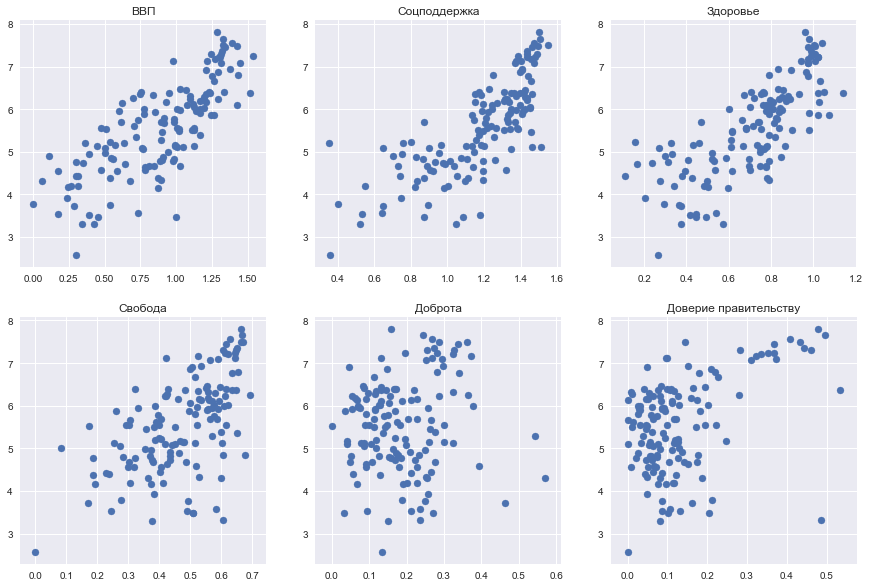

In [11]:
plt.style.use('seaborn')
y = df['happiness_score']
fig, ax = plt.subplots(nrows=2, ncols=3)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
fig.set_size_inches(15, 10)
ax1.scatter(df['gdp_per_capita'], y)
ax1.set_title('ВВП')
ax2.scatter(df['social_support'], y)
ax2.set_title('Соцподдержка')
ax3.scatter(df['health'], y)
ax3.set_title('Здоровье')
ax4.scatter(df['freedom'], y)
ax4.set_title('Свобода')
ax5.scatter(df['generosity'], y)
ax5.set_title('Доброта')
ax6.scatter(df['government_trust'], y)
ax6.set_title('Доверие правительству')
plt.show()

Более выражена линейная зависимость оценки счастья от признаков gdp_per_capita, social_support и health; вероятно, можно отбросить признаки government_trust и generosity, и возможно даже freedom (как ни странно).

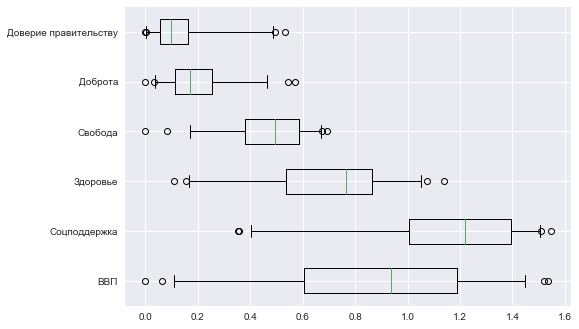

In [24]:
plt.boxplot(df.loc[:,'gdp_per_capita':'government_trust'].to_numpy(),vert=False,whis=(1,99),labels=['ВВП','Соцподдержка','Здоровье','Свобода','Доброта','Доверие правительству'])
plt.show()

Также на боксплоте видны выбросы, которые попробуем заменить на среднее (их удаление приводило к ухудшению моделей). Значения квантилей выбраны экспериментальным путем.

In [25]:
cols = [n for n in df.loc[:,'gdp_per_capita':'government_trust'].columns]
outliers = []
for col in cols:
    m = df[col].mean()
    out = df[(df[col] < df[col].quantile(0.01)) | (df[col] > df[col].quantile(0.99))].index
    for country in out:
        df.loc[country, col] = m
        outliers.append(country)
outliers

['Luxembourg',
 'Singapore',
 'Congo (Kinshasa)',
 'Burundi',
 'Iceland',
 'Benin',
 'Turkmenistan',
 'Afghanistan',
 'Singapore',
 'Japan',
 'Ivory Coast',
 'Chad',
 'Uzbekistan',
 'Algeria',
 'Cambodia',
 'Afghanistan',
 'Greece',
 'Indonesia',
 'Myanmar',
 'Botswana',
 'Denmark',
 'Singapore',
 'Romania',
 'Bulgaria']

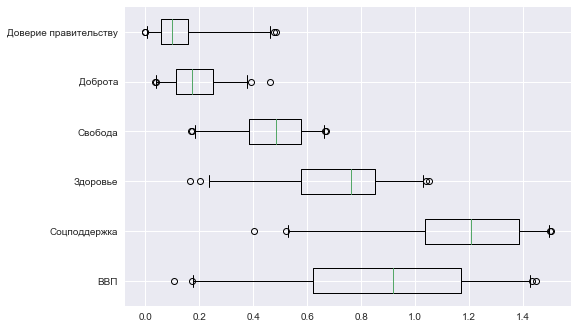

In [27]:
plt.boxplot(df.loc[:,'gdp_per_capita':'government_trust'].to_numpy(),vert=False, whis=(1,99), labels=['ВВП','Соцподдержка','Здоровье','Свобода','Доброта','Доверие правительству'])
plt.show()

In [28]:
df.describe()

,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent_Africa,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,5.550574,0.886676,1.177133,0.713232,0.472359,0.184367,0.128382,1.997306,0.253623,0.282609,0.014493,0.282609,0.021739,0.144928
std,1.100890,0.339641,0.251400,0.220259,0.127049,0.088703,0.105016,0.560026,0.436669,0.451908,0.119946,0.451908,0.146362,0.353310
min,2.566900,0.108330,0.403575,0.167836,0.169298,0.035712,0.001172,0.257241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.774825,0.623429,1.037891,0.576264,0.386430,0.116384,0.059730,1.685173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.550900,0.918472,1.206196,0.761604,0.486442,0.172538,0.099167,2.054998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.298750,1.168706,1.385016,0.852542,0.579054,0.252509,0.158477,2.376544,0.750000,1.000000,0.000000,1.000000,0.000000,0.000000
max,7.808700,1.446887,1.503449,1.051343,0.670201,0.463910,0.485542,3.440810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Данные варьируются у разных признаков в разных диапазонах, поэтому следует их стандартизировать.

In [29]:
scaler = StandardScaler()
feat_names = [n for n in df.columns]
features_st = scaler.fit_transform(df)
df_st = pd.DataFrame(features_st, columns=feat_names)

Поскольку целевая переменная - непрерывная величина, для машинного обучения следует применить модель линейной регрессии.

1) Обучение модели линейной регрессии на всех признаках

In [30]:
# сначала разбиение датасета на тренировочный и проверочный наборы:
X = df_st[feat_names[1:14]]
y = df['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = lr.predict(X_test)

In [33]:
# предсказанные vs фактические значения
compare = pd.DataFrame({'y_test': y_test,
                     'y_pred': y_pred})
compare.head()

,y_test,y_pred
country,,
Bulgaria,5.1015,5.308278
Mali,4.7293,4.473289
United Kingdom,7.1645,7.282571
Spain,6.4009,6.473517
Paraguay,5.6921,5.790305


In [34]:
# оценка модели:
mse_1 = mse(compare['y_pred'], compare['y_test'])
r2_1 = r2(compare['y_pred'], compare['y_test'])

In [35]:
mse_1

0.024482383684389843

In [36]:
r2_1

0.9818103642497233

Результаты работы модели по всем признакам подозрительно точные, возможно, это связано с наличием признака dystopia_residual, который не влияет на happiness_score, а рассчитывается отдельно (https://worldhappiness.report/faq/).

In [37]:
feature_coef = pd.DataFrame(zip(X_train.columns, lr.coef_.round(6)), columns=['feature_name', 'coef'])

feature_coef.sort_values(by='coef', ascending=False, inplace=True)
feature_coef

,feature_name,coef
6,dystopia_residual,0.496635
0,gdp_per_capita,0.331921
2,health,0.270150
1,social_support,0.249533
3,freedom,0.175680
5,government_trust,0.108579
4,generosity,0.106955
8,continent_Asia,0.011357
10,continent_Europe,0.009628
12,continent_South America,0.009376


Высокий коэффициент признака dystopia_residual говорит в пользу этого предположения.

2. Обучение модели линейной регрессии на выборочном наборе признаков (без dystopia_residual)

In [38]:
df_d = df.drop('dystopia_residual',axis=1) # отбрасываем dystopia_residual
features = [n for n in df_d.columns]
df_prep = df[features]

In [39]:
features_st = scaler.fit_transform(df_prep)
df_st = pd.DataFrame(features_st, columns=features)

In [40]:
# сначала разбиение датасета на тренировочный и проверочный наборы:
X = df_st.iloc[:, 1:13]
y = df['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [41]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = lr.predict(X_test)

In [43]:
# предсказанные vs фактические значения
compare = pd.DataFrame({'y_test': y_test,
                     'y_pred': y_pred})
compare.head()

,y_test,y_pred
country,,
Bulgaria,5.1015,5.975903
Mali,4.7293,4.037676
United Kingdom,7.1645,7.192509
Spain,6.4009,6.594143
Paraguay,5.6921,6.312159


In [44]:
# оценка модели:
mse_2 = mse(compare['y_pred'], compare['y_test'])
r2_2 = r2(compare['y_pred'], compare['y_test'])

In [45]:
mse_2

0.21755506682073553

In [46]:
r2_2

0.8017513414909282

Результаты правдоподобнее первой модели.

3) В порядке эксперимента, предположим, что happiness_score можно спрогнозировать по трем наиболее значимым признакам: ВВП, соцподдержке и здоровью:

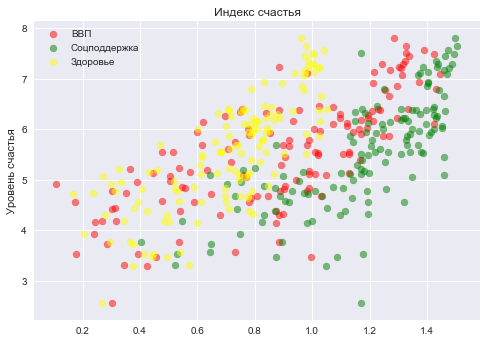

In [47]:
y = df['happiness_score']
plt.scatter(df['gdp_per_capita'], y, color='red', alpha=0.5, label='ВВП')
plt.scatter(df['social_support'], y, color='green', alpha=0.5, label='Соцподдержка')
plt.scatter(df['health'], y, color='yellow', alpha=0.5, label='Здоровье')
plt.ylabel('Уровень счастья')
plt.title('Индекс счастья')
plt.legend()
plt.show()

In [48]:
X = df_st[['gdp_per_capita','social_support', 'health']]
y = df['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [49]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = lr.predict(X_test)

In [51]:
# предсказанные vs фактические значения
compare = pd.DataFrame({'y_test': y_test,
                     'y_pred': y_pred})
compare.head()

,y_test,y_pred
country,,
Bulgaria,5.1015,6.152795
Mali,4.7293,3.941914
United Kingdom,7.1645,6.726748
Spain,6.4009,6.798153
Paraguay,5.6921,5.840059


In [52]:
# оценка модели:
mse_3 = mse(compare['y_pred'], compare['y_test'])
r2_3 = r2(compare['y_pred'], compare['y_test'])

In [53]:
mse_3

0.2863024617165324

In [54]:
r2_3

0.6927251119167156

Результаты оказались хуже второй модели (то есть без freedom никак).

4) Для сравнения применяем модель RandomForestRegressor

In [55]:
# на том же наборе признаков, что и лучшая по результату модель линейной регрессии (то есть со всеми признаками, кроме dystopia_residual)
X = df_st.iloc[:, 1:13]
y = df['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [56]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
# предсказанные vs фактические значения
compare = pd.DataFrame({'y_test': y_test,
                     'y_pred': y_pred})
compare.head()

,y_test,y_pred
country,,
Bulgaria,5.1015,6.070218
Mali,4.7293,4.609360
United Kingdom,7.1645,7.042210
Spain,6.4009,6.683559
Paraguay,5.6921,6.098117


In [59]:
# оценка модели:
mse_4 = mse(compare['y_pred'], compare['y_test'])
r2_4 = r2(compare['y_pred'], compare['y_test'])

In [60]:
mse_4

0.20446163678120866

In [61]:
r2_4

0.7714010917839331

Похожие результаты были и у GradientBoostingRegressor. Результаты модели RandomForestRegressor чуть хуже, чем у модели линейной регрессии в ее лучшем варианте:

In [62]:
res = pd.DataFrame({'MSE' : [mse_1, mse_2, mse_3, mse_4],
                   'R2' : [r2_1, r2_2, r2_3, r2_4]}, index=['lr1', 'lr2', 'lr3', 'rfr'])
res.sort_values('R2', ascending=False)

,MSE,R2
lr1,0.024482,0.981810
lr2,0.217555,0.801751
rfr,0.204462,0.771401
lr3,0.286302,0.692725


Выводы. Самый хороший результат без признака dystopia_residual показала модель линейной регрессии после после замены выбросов на среднее (до удаления выбросов максимальное достижение метрики r2 составляло около 0.76).